# Final Project : Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# 1. Import the dataset using Pandas from the link

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
# 2. High Level Data Understanding:
# 2.1 - Find number of rows and columns in the dataset

In [3]:
print('Column count : ', df.shape[1])
print('Row count :', df.shape[0])

Column count :  49
Row count : 57394


In [6]:
#2.2 - Data types of columns

In [3]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [8]:
# 2.3 - info and describe of data in dataframe

In [41]:
df.info

<bound method DataFrame.info of       iso_code continent       location      date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  31/12/19          NaN        0.0   
1          AFG      Asia    Afghanistan  01/01/20          NaN        0.0   
2          AFG      Asia    Afghanistan  02/01/20          NaN        0.0   
3          AFG      Asia    Afghanistan  03/01/20          NaN        0.0   
4          AFG      Asia    Afghanistan  04/01/20          NaN        0.0   
...        ...       ...            ...       ...          ...        ...   
57389      NaN       NaN  International  13/11/20        696.0        NaN   
57390      NaN       NaN  International  14/11/20        696.0        NaN   
57391      NaN       NaN  International  15/11/20        696.0        NaN   
57392      NaN       NaN  International  16/11/20        696.0        NaN   
57393      NaN       NaN  International  17/11/20        696.0        NaN   

       new_cases_smoothed  total_deaths  ne

In [4]:
df.describe

<bound method NDFrame.describe of       iso_code continent       location      date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  31/12/19          NaN        0.0   
1          AFG      Asia    Afghanistan  01/01/20          NaN        0.0   
2          AFG      Asia    Afghanistan  02/01/20          NaN        0.0   
3          AFG      Asia    Afghanistan  03/01/20          NaN        0.0   
4          AFG      Asia    Afghanistan  04/01/20          NaN        0.0   
...        ...       ...            ...       ...          ...        ...   
57389      NaN       NaN  International  13/11/20        696.0        NaN   
57390      NaN       NaN  International  14/11/20        696.0        NaN   
57391      NaN       NaN  International  15/11/20        696.0        NaN   
57392      NaN       NaN  International  16/11/20        696.0        NaN   
57393      NaN       NaN  International  17/11/20        696.0        NaN   

       new_cases_smoothed  total_deaths  

In [11]:
# 3. Low level Data Understanding:
#3.1 - Find count of unique values in location column

In [5]:
print(df['location'].nunique())

216


In [13]:
# 3.2 - Find which continent has maximum frequency using values counts. 

In [6]:
df['continent'].value_counts()

Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: continent, dtype: int64

In [15]:
# 3.3 - Find maximum and mean value in 'total_cases'

In [7]:
max_val = df['total_cases'].max()
mean_val = df['total_cases'].mean()
print('Maximum value in total_cases : ', max_val)
print('Mean value in total_cases : ', mean_val)

Maximum value in total_cases :  55154651.0
Mean value in total_cases :  167797.3688753302


In [17]:
# 3.4 - Find 25%, 50% and 75% quartile value in 'total_deaths'.

In [8]:
df['total_deaths'].describe()

count    4.436800e+04
mean     6.858639e+03
std      5.578081e+04
min      1.000000e+00
25%      1.300000e+01
50%      8.400000e+01
75%      7.270000e+02
max      1.328537e+06
Name: total_deaths, dtype: float64

In [33]:
# 3.5 - Find which continent has maximum 'human_development_index'.

In [4]:
df[df['human_development_index'] == max(df['human_development_index'])]['continent']

38632    Europe
38633    Europe
38634    Europe
38635    Europe
38636    Europe
          ...  
38950    Europe
38951    Europe
38952    Europe
38953    Europe
38954    Europe
Name: continent, Length: 323, dtype: object

In [49]:
# 3.6 - Find which continent has minimum 'gdp_per_capita'.

In [10]:
df[df['gdp_per_capita'] == min(df['gdp_per_capita'])]['continent']

10259    Africa
10260    Africa
10261    Africa
10262    Africa
10263    Africa
          ...  
10501    Africa
10502    Africa
10503    Africa
10504    Africa
10505    Africa
Name: continent, Length: 247, dtype: object

In [11]:
# 4. Filter the dataframe with only these columns ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index'] and update the dataframe.

In [3]:
df_filter = df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]
df_filter

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [14]:
# 5. Data Cleaning
#5.1 - Remove all duplicate observation

In [4]:
df.drop_duplicates()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 5.2 -  Find missing values in all columns 

In [5]:
df.isnull().sum()

iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_millio

In [15]:
#5.3 - Remove all observations where continent column is missing

In [6]:
df.dropna(subset = ['continent'])

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56743,ZWE,Africa,Zimbabwe,13/11/20,8696.0,29.0,36.000,255.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56744,ZWE,Africa,Zimbabwe,14/11/20,8765.0,69.0,42.000,257.0,2.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56745,ZWE,Africa,Zimbabwe,15/11/20,8786.0,21.0,41.143,257.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56746,ZWE,Africa,Zimbabwe,16/11/20,8786.0,0.0,36.429,257.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [18]:
#5.4 Fill all missing values with 0

In [7]:
df.fillna('0')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,0,0.0,0,0,0.0,0,...,1803.987,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,0,0.0,0,0,0.0,0,...,1803.987,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,0,0.0,0,0,0.0,0,...,1803.987,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,0,0.0,0,0,0.0,0,...,1803.987,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,0,0.0,0,0,0.0,0,...,1803.987,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,13/11/20,696.0,0,0,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
57390,0,0,International,14/11/20,696.0,0,0,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
57391,0,0,International,15/11/20,696.0,0,0,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
57392,0,0,International,16/11/20,696.0,0,0,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# 6. Date Time format
#6.1 -  COnvert date column in datetime format 

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 float64
icu_patients_per_million                     f

In [26]:
#6.2 - Create new column month after extracting month data from date column

In [9]:
df['Month'] = pd.DatetimeIndex(df['date']).month
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,12
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,1
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,2
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,3
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,4


In [29]:
# 7. Data Aggregation
#7.1 Find max value in all columns using groupby function on 'continent' column
#7.2 Store the result in new dataframe 'df_groupby'

In [10]:
df_groupby = df.groupby(['continent']).max().reset_index()
df_groupby

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,7.1,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12


In [40]:
#8 . Feature Engineering
#Create 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases' column

In [11]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths']/df_groupby['total_cases']
df_groupby

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month,total_deaths_to_total_cases
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12,0.027004
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12,0.014708
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12,0.026188
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12,0.022062
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12,0.032685
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12,0.028251


In [46]:
#9. Data Visualization
#9.1 - Perform univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn

<AxesSubplot:xlabel='gdp_per_capita'>

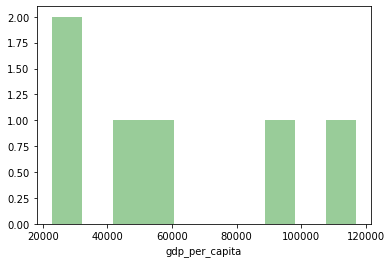

In [13]:
sns.distplot(df_groupby['gdp_per_capita'], kde = False, color = 'green', bins = 10)

In [49]:
#9.2 Plot a scatter plot of 'total_cases' and 'gdp_per_capita'

<AxesSubplot:xlabel='total_cases', ylabel='gdp_per_capita'>

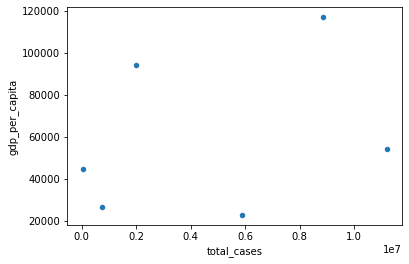

In [14]:
df_groupby.plot.scatter( x = 'total_cases',
                       y = 'gdp_per_capita')

In [52]:
#9.3 Plot pairplot on df_groupby dataset

In [15]:
sns.pairplot(df_groupby)

In [16]:
#9.4 Plot a barplot on 'continent' column with 'total_cases' 

<AxesSubplot:xlabel='continent', ylabel='total_cases'>

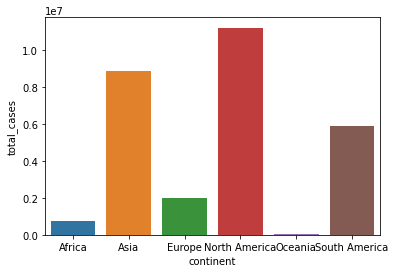

In [18]:
sns.barplot(x = 'continent', y = 'total_cases', data = df_groupby)

In [19]:
#10. Save the df_groupby dataframe in your local computer with pandas.to_csv function

In [28]:
df_groupby.to_csv('df_groupby_dataframe.csv', index = False)

In [29]:
## checking if it's working or not 
df_saved = pd.read_csv('df_groupby_dataframe.csv')
df_saved

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month,total_deaths_to_total_cases
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12,0.027004
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12,0.014708
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12,0.026188
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12,0.022062
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12,0.032685
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12,0.028251


In [ ]:
#Working!